📈 Mean Absolute Error (MAE): 27380.29
📉 Root Mean Squared Error (RMSE): 41835.27


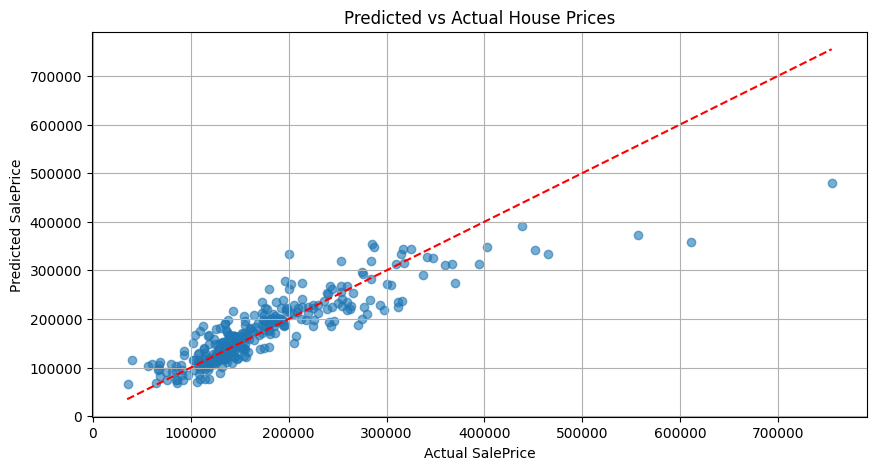

In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Upload train.csv in Google Colab (Run this first if using Colab)


# Step 3: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (3)/train (1).csv')

# Step 4: Select Relevant Columns (features + target)
df = df[['GrLivArea', 'BedroomAbvGr', 'Neighborhood', 'SalePrice']]

# Step 5: Drop missing values (if any)
df.dropna(inplace=True)

# Step 6: One-hot Encode Categorical Feature (Neighborhood)
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Step 7: Split Features and Target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Step 8: Feature Scaling (on numerical columns only)
scaler = StandardScaler()
X[['GrLivArea', 'BedroomAbvGr']] = scaler.fit_transform(X[['GrLivArea', 'BedroomAbvGr']])

# Step 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 11: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📈 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 12: Scatter Plot - Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()






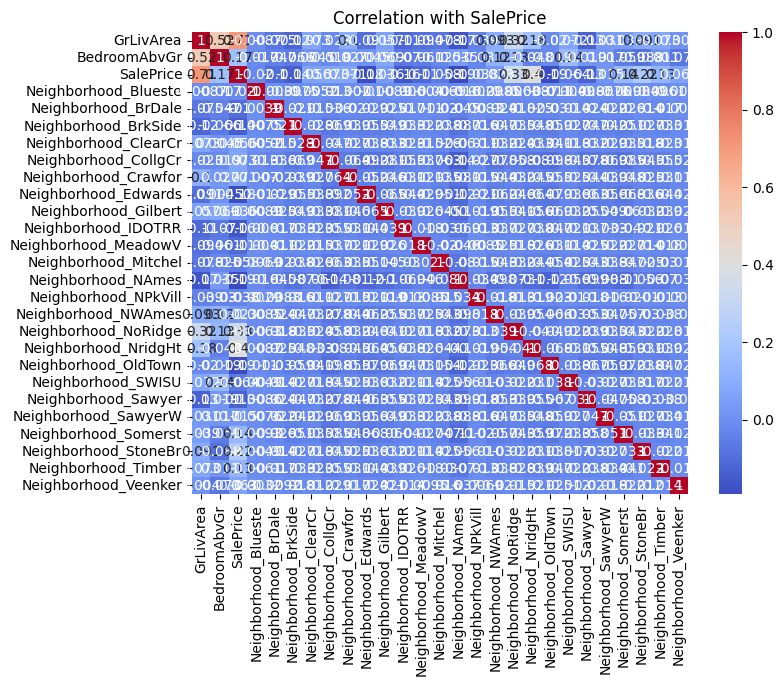

In [12]:
# Step 13: Heatmap - Feature Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation with SalePrice")
plt.show()

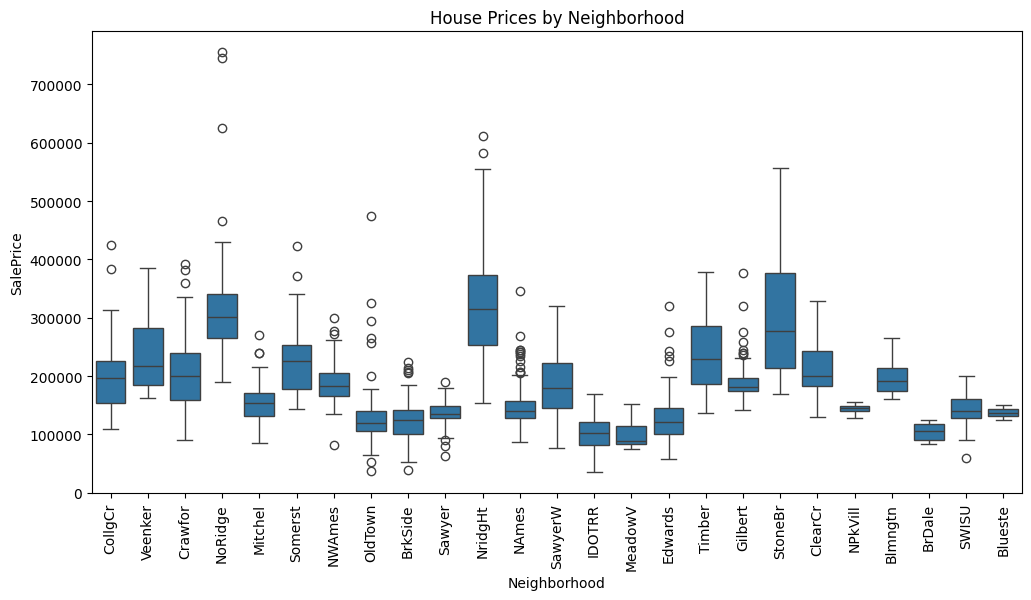

In [11]:
# Step 14: Price Distribution by Neighborhood
# Reload data (before encoding) to plot boxplot
df_box = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (3)/train (1).csv')
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_box)
plt.xticks(rotation=90)
plt.title("House Prices by Neighborhood")
plt.show()
